# Your info

Full name:MohammadHossein Karimian

Student ID:97521468

## Loading dataset

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
np.random.seed(1)

In [13]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    X = X.T
    Y = Y.T
    return X, Y

You have:

- a numpy-array (matrix) X that contains your features (x1, x2)
- a numpy-array (vector) Y that contains your labels (red:0, blue:1).

In [14]:
X, Y = load_planar_dataset() 
m = Y.shape[1]

print ('The shape of X is: ' + str(X.shape))
print ('The shape of Y is: ' + str(Y.shape))
print ('Number of training examples: ' + str(m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
Number of training examples: 400


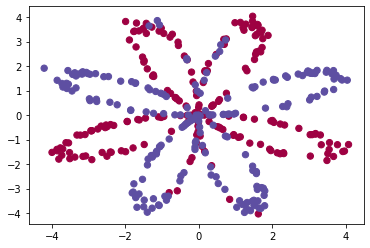

In [15]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

## Example for plotting decision boundry

In [16]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [17]:
# Train a simple logistic regression classifier with sklearn
# sklearn takes transpose of X
# sklearn takes ravel of transpose of Y
# The shape of X.T is: (400, 2)
# The shape of np.ravel(Y.T) is: (400,)

model = LogisticRegression()
model.fit(X.T, np.ravel(Y.T))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# Plot decision boundry on trained data
# plot_decision_boundary takes a prediction of sklearn model for anonymous input of x
# plot_decision_boundary takes X: (2, 400)
# plot_decision_boundary takes Y: (1, 400)

plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.title("Decision Boundry")

Text(0.5, 1.0, 'Decision Boundry')

# Q1. Perceptron

accuracy of 0: 0.372500
accuracy of 100: 0.482500
accuracy of 200: 0.480000
accuracy of 300: 0.492500
accuracy of 400: 0.485000
accuracy of 500: 0.495000
accuracy of 600: 0.487500
accuracy of 700: 0.480000
accuracy of 800: 0.487500
accuracy of 900: 0.485000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


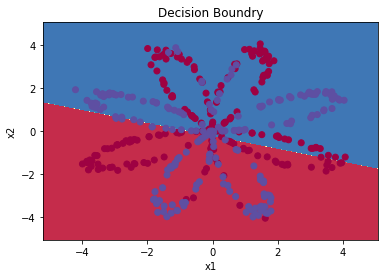

In [19]:
# Q1_graded
# Do not change the above line.

def predict(x,w,b):
  pr = 1/(1+np.exp(-(np.dot(x,w)+b)))
  pr[pr>0.5]=1
  pr[pr<=0.5]=0
  return pr


def GD(Epochs,sgd,learning_rate):
  epoch=Epochs
  n = X.shape[1]
  #l = 0.01 the best learning rate
  l=learning_rate
  b = 0
  w = np.array([0.15,0.11])
  loss = []
  for i in range(0,epoch):
    if (not sgd):
      if(i>(1/l)):
        l = 0.001*(1/i)
      sigma=np.dot(X.T,w)+b
      d = 1/(1+np.exp(-sigma))
      lll =-np.mean(Y*(np.log(d)) - (1-Y)*np.log(1-d))
      loss.append(lll)
      deltaw = (np.dot(X,(d-Y[0])))/400
      deltab = (np.sum(d-Y)/400)
      if i % 100 == 0:
        print("cost of %i: %f" % (i, lll))
    else:
      ind = np.random.randint(0, len(X)) # random point
      chosen = X.T[ind]
      f=Y[0][ind]-np.dot(chosen,w)
      deltaw = np.dot(chosen,f)
      deltab = f
    w -= l*deltaw
    b -= l*deltab
    pl = predict(X.T,w,b)
    accuracy = np.sum(Y[0] == pl) / len(Y[0])
    if i % 100 == 0:
      print("accuracy of %i: %f" % (i, accuracy))

  
  plot_decision_boundary(lambda x: predict(x,w,b), X, Y)
  plt.title("Decision Boundry")

GD(1000,True,0.01) #calling Gradient Descent function

برای پیاده سازی یک پرسپترون ساده،وزن ها و بایس های مناسب را انتخاب می کنیم و سپس در هر تکرار با بذست آوردن سیگما که مجموع ضرب ورودی و وزن هاست حساب کردن هزینه بر اساس "باینری کلاس آنتروپی" بدست می آوریم.سپس با بدست آوردن تغییرات وزن و تغییرات بایس با کمک این مقادیر فرایند را ادامه می دهیم و هزینه و دقت را در هر مرحله چاپ می کنیم.

# Q2. MLP

In [20]:
# Q2_graded
# Do not change the above line.
m = 400

i_count = 1
def for_prop(X, parameters, n_layers,le_r):
    cache = {}
    outp = X

    for ind in range(n_layers - 1):
        b_name = "b" + str(ind)
        w_name = "w" + str(ind)
        a_name = "a" + str(ind)
        z_name = "z" + str(ind)
        cache[z_name] = np.dot(parameters[w_name], outp) + parameters[b_name]
        if (ind != n_layers - 2):
            cache[a_name] = np.tanh(cache[z_name])
        else:
            cache[a_name] = sigmoid(cache[z_name])
            tempp = cache[a_name]
            tempp[tempp>0.5]=1
            tempp[tempp<=0.5]=0
            accuracy = np.sum(Y[0] == tempp ) / len(Y[0])
            global i_count
            if i_count % 100 == 0:
              print("accuracy of %i_count: %f" % (i_count, accuracy))
            i_count+=1
        outp = cache[a_name]
        

    # print(parameters)
    # print(cache)
    return outp, cache


def ReLu(inp):
    return np.maximum(inp, 0)


def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s


def costf(output, Y, parameters,le_r):
    m = Y.shape[1]  # number of example

    temp = np.multiply(np.log(output), Y) + np.multiply(np.log(1 - output), (1 - Y))
    cost = -(1.0 / m) * np.sum(temp)

    cost = np.squeeze(cost)

    return cost


def back_prop(parameters, cache, X, Y, n_layers,le_r):
    m = X.shape[1]
    dzlast = []

    for ind in range(n_layers - 2, -1, -1):
        alast = "a" + str(ind - 1)

        b_name = "b" + str(ind)
        w_name = "w" + str(ind)
        a_name = "a" + str(ind)
        z_name = "z" + str(ind)

        output = cache[a_name]
        if (ind == 0):
            output = X.T
        else:
            output = cache[alast].T

        curw = parameters[w_name]
        curb = parameters[b_name]
        if (ind == n_layers - 2):
            dz = cache[a_name] - Y
            dw = 1.0 / m * np.dot(dz, output)
            db = 1.0 / m * np.sum(dz, axis=1, keepdims=True)
            dzlast = dz
            parameters[w_name] = curw - le_r * dw
            parameters[b_name] = curb - le_r * db
        else:
            wlast = "w" + str(ind + 1)
            w_cur = parameters[wlast]
            w_cur = np.einsum('ij->ji', w_cur)
            dz = np.dot(w_cur, dzlast) * (1 - np.power(cache[a_name], 2))
            dw = 1.0 / m * np.dot(dz, output)
            db = 1.0 / m * np.sum(dz, axis=1, keepdims=True)
            dzlast = dz
            parameters[w_name] = curw - le_r * dw
            parameters[b_name] = curb - le_r * db

    return parameters


def mlp(X, Y, inp,le_r=0.01, num_it=10000):
    # np.random.seed(3)
    inp.append(1)
    inp.insert(0, 2)
    weights = []
    bias = []
    parameters = {}
    n_layers = len(inp)
    for ind in range(len(inp) - 1):
        bias.append(np.zeros((inp[ind + 1], 1)))
        b_name = "b" + str(ind)
        w_name = "w" + str(ind)
        parameters[b_name] = bias[ind]
        parameters[w_name] = np.random.randn(inp[ind + 1], inp[ind])
    for i in range(0, num_it):

        output, cache = for_prop(X, parameters, n_layers,le_r)

        cost = costf(output, Y, parameters,le_r)

        parameters = back_prop(parameters, cache, X, Y, n_layers,le_r)

        if i % 100 == 0:
            print("Cost of %i: %f" % (i, cost))

    return parameters


def predict(parameters, X, n,le_r):
    output, cache = for_prop(X, parameters, n,le_r)
    predictions = (output > 0.5)

    return predictions


inputs = [4]
parameters = mlp(X, Y, inputs,0.1, num_it=10000)

plot_decision_boundary(lambda x: predict(parameters, x.T, len(inputs),le_r=0.01), X, Y.flatten())
plt.title("Decision Boundary ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in multiply


Cost of 0: nan
accuracy of 100_count: 0.702500
Cost of 100: nan
accuracy of 200_count: 0.612500
Cost of 200: nan
accuracy of 300_count: 0.610000
Cost of 300: nan
accuracy of 400_count: 0.725000
Cost of 400: nan
accuracy of 500_count: 0.755000
Cost of 500: nan
accuracy of 600_count: 0.655000
Cost of 600: nan
accuracy of 700_count: 0.797500
Cost of 700: nan
accuracy of 800_count: 0.672500
Cost of 800: nan
accuracy of 900_count: 0.645000
Cost of 900: nan
accuracy of 1000_count: 0.835000
Cost of 1000: nan
accuracy of 1100_count: 0.765000
Cost of 1100: nan
accuracy of 1200_count: 0.807500
Cost of 1200: nan
accuracy of 1300_count: 0.802500
Cost of 1300: nan
accuracy of 1400_count: 0.825000
Cost of 1400: nan
accuracy of 1500_count: 0.847500
Cost of 1500: nan
accuracy of 1600_count: 0.707500
Cost of 1600: nan
accuracy of 1700_count: 0.732500
Cost of 1700: nan
accuracy of 1800_count: 0.837500
Cost of 1800: nan
accuracy of 1900_count: 0.857500
Cost of 1900: nan
accuracy of 2000_count: 0.870000
C

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Text(0.5, 1.0, 'Decision Boundary ')

تضیحات کد: برای پیاده سازی یک شیکه عصبی چند لایه ما طبق الگوریتم توابع مورد نیاز را به ترتیب می نویسیم.
ابتدا با نوشتن نورون های لایه های میانی در آرایه ی ورودی ها و اضافه کردن دو به اول آن به ازای دو نورون ورودی و اضافه کردن عدد 1 به آخر آرایه به ازای خروجی، آرایه ای کلی از هر لایه خواهیم داشت.دیکشنری از پارامتر ها درست می کنیم و در ابتدا با توجه به آرایه ورودی،مقادیر اولیه ای برای وزن ها و بایس های بین هر لایه قرار می دهیم.سپس به ازای هر نکرار، تابع "فوروارد پروپگیشن" را صدا می زنیم و در آن به ازای هر لایه خروجی و گرادیان آن را حساب کرده و در دیکشنری کش ذخیره می کنیم.برای خروجی لایه های میانی کد برای هر دو تابع تانژانت هایپربولیک و "آر ای ال یو" زده شده است که چون تانژانت هایپر بولیک نتیجه بهتری می دهد آن را انتخاب می کنیم. برای "بکوارد پروپگیشن" با استفاده از دیکشنری های پارامتر و کش که گرادیان و وزن ها را در خود دارند و با استفاده از فرمول های مربوطه، تغییرات وزن و بایس ها را انجام میدهیم.در نهایت در تابع هزینه، از باینری کلاس آنتروپی که نتیجه بهتری می دهد استفاده می کنیم.


# Q3. Keras

In [21]:
# Q3_graded
# Do not change the above line.
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from keras.layers import Dense, Flatten

(x_train, y_train), (x_test, y_test) =keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
keras.optimizers.SGD(
   learning_rate=0.01, momentum=1, nesterov=False, name="SGD"
)

model = keras.Sequential([Flatten(input_shape=(28, 28)),
    Dense(100, activation=tf.nn.tanh),
    Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data



Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4814 - accuracy: 0.8280
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3707 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3351 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3144 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2975 - accuracy: 0.8892
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2827 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2744 - accuracy: 0.8980
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2630 - accuracy: 0.9024
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2550 - accuracy: 0.9052
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.245

توضیح کد: ابتدا کتابخانه های مورد نیاز را ایمپورت میکنیم.تا با استفاده از کراس و لایه های آن،شبکه پرسپترون چند لایه خود را طراجی می کنیم.در شروع باید مجموعه دادگان را لود کنیم.پس از آن برای نرمال کردم دیتای ورودی، آن را بر 255 تقسیم می کنیم سپس با استفاده از تابع ترتیبی کراس، لایه های شبکه خود را تعریف می کنیم.از طریق صاف کردن(فلتن) ماتریس را به آرایه تبدیل می کنیم و سپس یک لایه میانی با 100 نورون و تابع فعالسازی تانژانت هایپربئلیک قرار می دهیم و در آخر هم یک لایه خروجی با 10 نورون که به تعداد کلاس های ما هستند با تابع فعالسازی"سافتمکس" که برای پیش بینی های چند کلاسی به کار می رود استفاده می کنیم.در آخر هم هنگام کامپایل کردن،تابع اتلافی برای این کلاس بندی انتخاب می کنیم و با دادن ورودی ها و عدد 10، به "فیت" 10 مرتبه الگوریتم  تکرار می شود و دقت و ضرر هر مرتبه پس از پایان آن قابل مشاهده است.

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**4PZD84**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q1_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/10GMhGM/Screen-Shot-2021-03-21-at-02-16-25.png)
  
    You should upload your **codes** and your **notebook** in `HW1` section and your final report for all of the questions as a **single pdf** file in `HW1 - Report`. Autograder will automatically check for:
    - `CI001_HW1.ipynb`
    - `Q1.py`
    - `Q2.py`
    - `Q3.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.